Họ tên: Nguyễn Anh Khôi

MSSV: 22127208

Link đến file Google Colab: [Click vào đây](https://colab.research.google.com/drive/15QKm2nxdf-YMje2G4lJg3iZBuqtKRnDa?usp=sharing)

# HW0: Làm quen với CUDA

Với các GPU tương đối mới thì để biên dịch chỉ cần dùng câu lệnh: \
`nvcc tên-file.cu -o tên-file-chạy`

Nhưng trên Colab mình thường lấy được GPU khá cũ là Tesla K80 với compute capability (phiên bản phần cứng) là 3.7; để biên dịch đúng với GPU khá cũ này thì bạn cần dùng câu lệnh: \
`nvcc -arch=sm_37 tên-file.cu -o tên-file-chạy` \
Trong đó, 37 chính là compute capability của GPU Tesla K80.

Để phòng trường hợp khi làm bài bạn lấy được GPU có compute capability x.x nhưng khi chấm bài Thầy lại lấy được GPU có compute capability khác x.x, dưới đây mình sẽ có đoạn code Python để tự động lấy 2 con số ứng với compute capability của GPU và lưu vào 2 biến `major` và `minor`:


In [ ]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


Một khi đã chạy đoạn code Python ở trên, để biên dịch thì bạn sẽ dùng câu lệnh: \
`nvcc -arch=sm_{major}{minor} tên-file.cu -o tên-file-chạy`

Dưới đây, khi làm bài thì bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell có chữ của Thầy là được.

## Câu 1

In [ ]:
!nvcc -arch=sm_{major}{minor} HW0_P1.cu -o HW0_P1.out

In [ ]:
!/content/HW0_P1.out

**********GPU info**********
GPU card's name: Tesla T4
GPU computation capability: 7.5
Maximum number of block dimensions:
Maximum threads along the x-axis: 1024
Maximum threads along the y-axis: 1024
Maximum threads along the z-axis: 64
Maximum number of grid dimensions:
Maximum blocks along the x-axis: 2147483647
Maximum blocks along the y-axis: 65535
Maximum blocks along the z-axis: 65535
Maximum size of GPU memory: 15828320256 bytes
Amount of constant memory: 65536 bytes
Amount of shared memory: 49152 bytes
Warp size: 32 threads
****************************


### Thông tin GPU
| **Property** | **Value** |
|---------------|------------|
| GPU card's name | Tesla T4 |
| GPU computation capability | 7.5 |
| **Maximum number of block dimensions** | |
| ├─ Max threads along x-axis | 1024 |
| ├─ Max threads along y-axis | 1024 |
| └─ Max threads along z-axis | 64 |
| **Maximum number of grid dimensions** | |
| ├─ Max blocks along x-axis | 2,147,483,647 |
| ├─ Max blocks along y-axis | 65,535 |
| └─ Max blocks along z-axis | 65,535 |
| Maximum size of GPU memory | 15,828,320,256 bytes (≈15.8 GB) |
| Amount of constant memory | 65,536 bytes (64 KB) |
| Amount of shared memory per block | 49,152 bytes (48 KB) |
| Warp size | 32 threads |

## Câu 2

In [ ]:
!nvcc -arch=sm_{major}{minor} HW0_P2.cu -o HW0_P2.out

In [ ]:
!/content/HW0_P2.out

==== Running addVecVer1 ====
Vector size: 64, processing time (use host): 0.008512 ms, add vec ver1.
GPU name: Tesla T4
GPU compute capability: 7.5
Vector size: 64, processing time (use device): 0.139936 ms, add vec ver1.
Vector size: 64, Version: ver1, CORRECT :)
Vector size: 256, processing time (use host): 0.009600 ms, add vec ver1.
GPU name: Tesla T4
GPU compute capability: 7.5
Vector size: 256, processing time (use device): 0.026592 ms, add vec ver1.
Vector size: 256, Version: ver1, CORRECT :)
Vector size: 1024, processing time (use host): 0.013728 ms, add vec ver1.
GPU name: Tesla T4
GPU compute capability: 7.5
Vector size: 1024, processing time (use device): 0.022496 ms, add vec ver1.
Vector size: 1024, Version: ver1, CORRECT :)
Vector size: 4096, processing time (use host): 0.026112 ms, add vec ver1.
GPU name: Tesla T4
GPU compute capability: 7.5
Vector size: 4096, processing time (use device): 0.022976 ms, add vec ver1.
Vector size: 4096, Version: ver1, CORRECT :)
Vector size:

### Results
| **Vector size** | **Host time (ms)** | **Device time (Version 1) (ms)** | **Device time (Version 2) (ms)** |
|------------------|--------------------|----------------------------------|----------------------------------|
| 64 | 0.008512 | 0.139936 | 0.049632 |
| 256 | 0.009600 | 0.026592 | 0.021248 |
| 1024 | 0.013728 | 0.022496 | 0.021952 |
| 4096 | 0.026112 | 0.022976 | 0.021440 |
| 16384 | 0.143168 | 0.023296 | 0.022656 |
| 65536 | 0.292320 | 0.026784 | 0.026656 |
| 262144 | 1.356512 | 0.035712 | 0.034272 |
| 1048576 | 4.814752 | 0.080896 | 0.097728 |
| 4194304 | 19.506752 | 0.251136 | 0.298816 |
| 16777216 | 77.010468 | 0.912256 | 1.128640 |

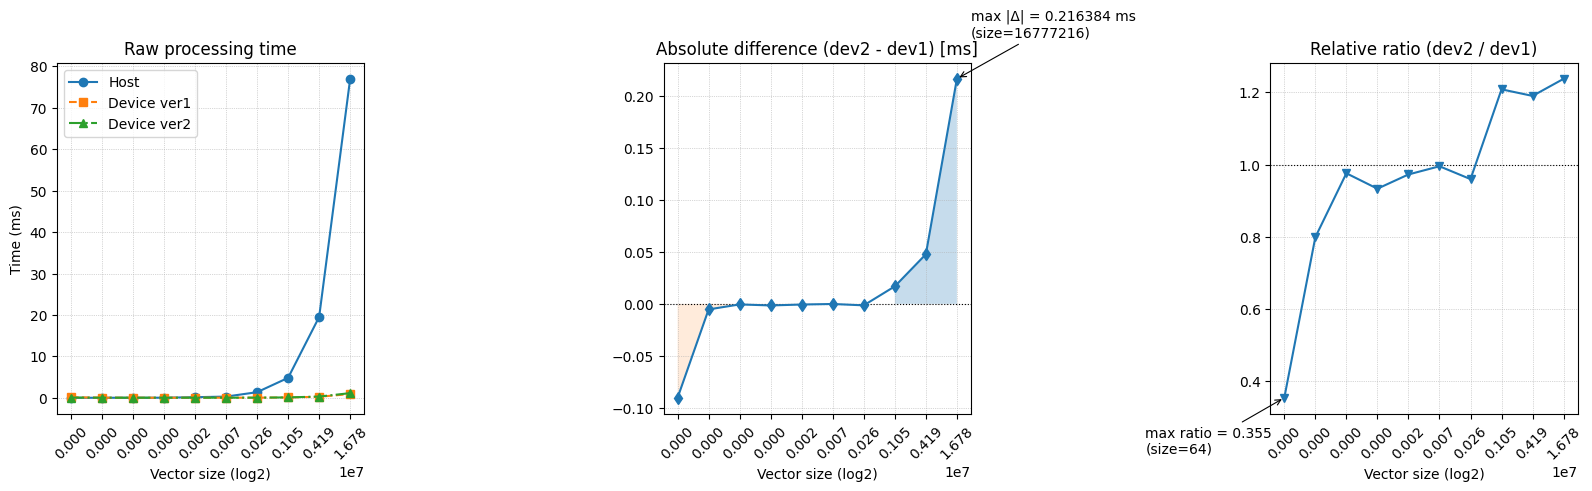

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
vec_sizes = np.array([64, 256, 1024, 4096, 16384, 65536, 262144, 1048576, 4194304, 16777216])

host_times = np.array([0.008512, 0.009600, 0.013728, 0.026112, 0.143168,
                       0.292320, 1.356512, 4.814752, 19.506752, 77.010468])

dev1_times = np.array([0.139936, 0.026592, 0.022496, 0.022976, 0.023296,
                       0.026784, 0.035712, 0.080896, 0.251136, 0.912256])

dev2_times = np.array([0.049632, 0.021248, 0.021952, 0.021440, 0.022656,
                       0.026656, 0.034272, 0.097728, 0.298816, 1.128640])

# Compute difference & ratio
diff = dev2_times - dev1_times           # positive -> dev2 slower
ratio = dev2_times / (dev1_times + 1e-12)  # >1 -> dev2 slower, <1 -> dev2 faster
pct_diff = 100.0 * diff / (dev1_times + 1e-12)  # percent difference relative to dev1

# Create figure with 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharex=True)

# 1) Original times (log x)
ax = axes[0]
ax.plot(vec_sizes, host_times, marker='o', linestyle='-', label='Host')
ax.plot(vec_sizes, dev1_times, marker='s', linestyle='--', label='Device ver1')
ax.plot(vec_sizes, dev2_times, marker='^', linestyle='-.', label='Device ver2')
ax.set_xscale('log', base=2)
ax.set_xlabel('Vector size (log2)')
ax.set_ylabel('Time (ms)')
ax.set_title('Raw processing time')
ax.set_xticks(vec_sizes)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', labelrotation=45)
ax.grid(which='both', linestyle=':', linewidth=0.5)
ax.legend()

# 2) Absolute difference (dev2 - dev1)
ax = axes[1]
ax.axhline(0, color='k', linewidth=0.8, linestyle=':')        # zero baseline
ax.plot(vec_sizes, diff, marker='d', linestyle='-', label='dev2 - dev1')
# highlight area above/below zero:
ax.fill_between(vec_sizes, diff, 0, where=(diff > 0), alpha=0.25)
ax.fill_between(vec_sizes, diff, 0, where=(diff < 0), alpha=0.15)
ax.set_xscale('log', base=2)
ax.set_xlabel('Vector size (log2)')
ax.set_title('Absolute difference (dev2 - dev1) [ms]')
ax.set_xticks(vec_sizes)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', labelrotation=45)
ax.grid(which='both', linestyle=':', linewidth=0.5)

# 3) Ratio (dev2 / dev1)
ax = axes[2]
ax.axhline(1.0, color='k', linewidth=0.8, linestyle=':')      # baseline = equal perf
ax.plot(vec_sizes, ratio, marker='v', linestyle='-', label='dev2 / dev1')
ax.set_xscale('log', base=2)
ax.set_xlabel('Vector size (log2)')
ax.set_title('Relative ratio (dev2 / dev1)')
ax.set_xticks(vec_sizes)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', labelrotation=45)
ax.grid(which='both', linestyle=':', linewidth=0.5)

# Annotate the largest absolute difference and largest ratio for emphasis
max_diff_idx = np.argmax(np.abs(diff))
max_ratio_idx = np.argmax(np.abs(ratio - 1.0))
axes[1].annotate(f'max |Δ| = {diff[max_diff_idx]:.6f} ms\n(size={vec_sizes[max_diff_idx]})',
                 xy=(vec_sizes[max_diff_idx], diff[max_diff_idx]),
                 xytext=(10, 30), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', lw=0.8))
axes[2].annotate(f'max ratio = {ratio[max_ratio_idx]:.3f}\n(size={vec_sizes[max_ratio_idx]})',
                 xy=(vec_sizes[max_ratio_idx], ratio[max_ratio_idx]),
                 xytext=(-100, -40), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', lw=0.8))

plt.tight_layout()
plt.savefig('device_diff_vs_size.png', dpi=150)
plt.show()